Best parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
MSE: 0.004081012269236648
RMSE: 0.06388280104407326
R2 Score: 0.8004394978368388


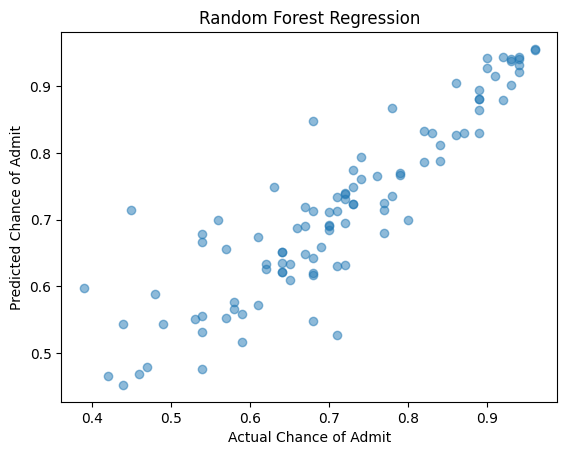

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

# Drop the 'Serial No.' column
df = df.drop('Serial No.', axis=1)

# Separate the features and target variable
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest Regression model and perform grid search for hyperparameter tuning
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Make predictions on the testing set using the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Best parameters:', grid_search.best_params_)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

# Visualize the results
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Random Forest Regression')
plt.show()

import pickle

# Save the model to disk
filename = 'random_forest_rgr_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_rf, file)
